In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#loading movie reviews data
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Preprocessing**

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#For reviewing the training dataset after vectorizing the input sequences
print("After vectorizing the sequences, a randomly selected 10th row from the dataset looks like this:\n",x_train[10])
num_rows = len(x_train)
num_cols = len(x_train[0])
print(f"The whole training data size: {num_rows} x {num_cols} = {x_train.size}")
print("Data type: ",x_train.dtype)

After vectorizing the sequences, a randomly selected 10th row from the dataset looks like this:
 [0. 1. 1. ... 0. 0. 0.]
The whole training data size: 25000 x 10000 = 250000000
Data type:  float64


In [4]:
#Converting labels into array vectors is quite straightforward
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
#splitting the training data to create a validation set
x_val = x_train[:10000]             #1st 10000 for validation
partial_x_train = x_train[10000:]   #rest 15000 for training
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**model building: approach 1**

In [ ]:
#model architecture
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#fit the model 
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_dict = history1.history
history1_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6956 - loss: 0.6031 - val_accuracy: 0.8578 - val_loss: 0.4113
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8903 - loss: 0.3547 - val_accuracy: 0.8700 - val_loss: 0.3409
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9171 - loss: 0.2586 - val_accuracy: 0.8859 - val_loss: 0.2934
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9333 - loss: 0.2082 - val_accuracy: 0.8875 - val_loss: 0.2757
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9483 - loss: 0.1674 - val_accuracy: 0.8857 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9554 - loss: 0.1469 - val_accuracy: 0.8826 - val_loss: 0.2939
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9614 - loss: 0.1257 - val_accuracy: 0.8861 - val_loss: 0.2908
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9674 - loss: 0.1081 - val_accuracy: 0.8840 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

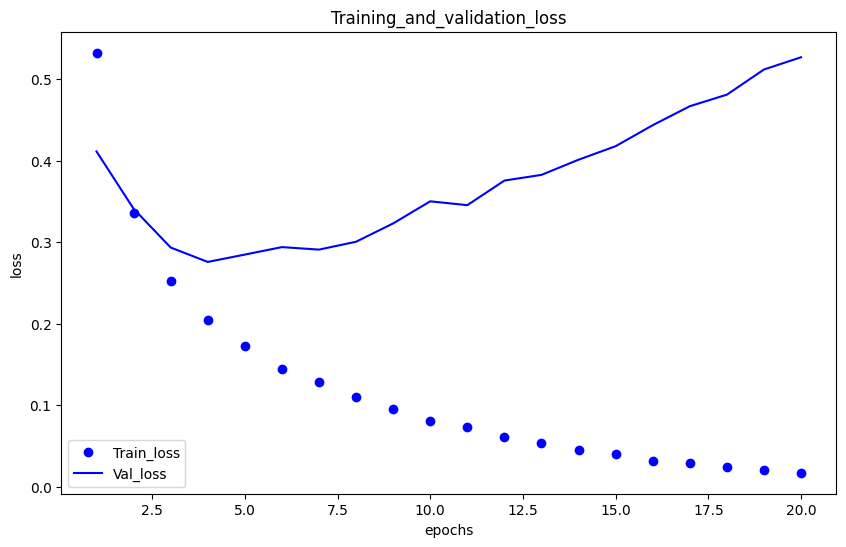

<Figure size 640x480 with 0 Axes>

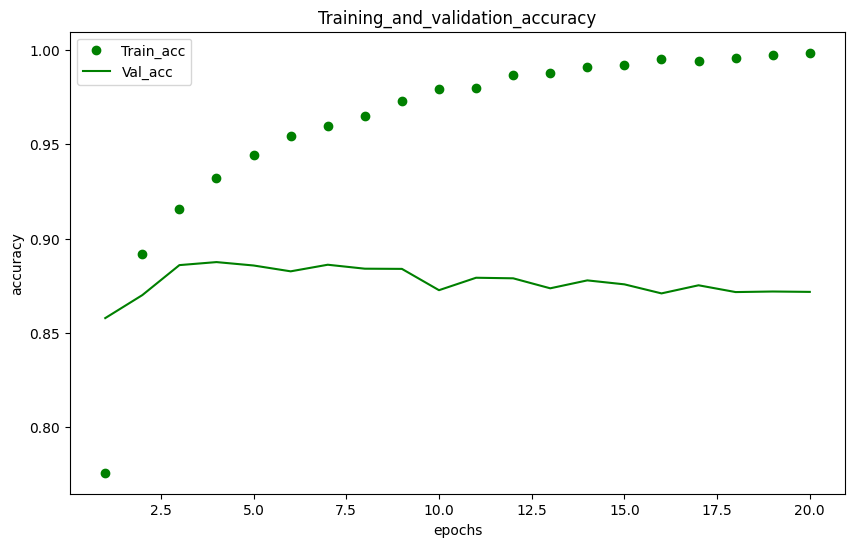

In [ ]:
#epoch wise performance observation
loss_values1 = history1_dict["loss"]
val_loss_values1 = history1_dict["val_loss"]
epochs = range(1, len(loss_values1) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values1, "bo", label="Train_loss")
plt.plot(epochs, val_loss_values1, "b", label="Val_loss")
plt.title("Training_and_validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))
acc1 = history1_dict["accuracy"]
val_acc1 = history1_dict["val_accuracy"]
plt.plot(epochs, acc1, "go", label="Train_acc")
plt.plot(epochs, val_acc1, "g", label="Val_acc")
plt.title("Training_and_validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
#Retrain the model from scratch on all training data after evaluating validation performance
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7281 - loss: 0.5717
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8985 - loss: 0.2983
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9241 - loss: 0.2155
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9381 - loss: 0.1823


In [ ]:
results1 = model1.evaluate(x_test, y_test)
print(results1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8817 - loss: 0.2914
[0.2924497723579407, 0.8830400109291077]


**Summary of the  approach 1:**

In the first trial, a 3-layer dense neural network was trained for 4 epochs (batch size: 512), achieving 88.30% accuracy and 29.24% loss. The model uses ReLU in two 16-neuron layers, followed by a Sigmoid-activated output neuron for binary classification. RMSprop was used as the optimizer with binary cross-entropy as the loss function.

**model building: approach 2**

In [12]:
#model architecture
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#fit the model in the partial training set
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
#keeping track
history2_dict = history2.history
history2_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6322 - loss: 0.6217 - val_accuracy: 0.8159 - val_loss: 0.4337
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8820 - loss: 0.3303 - val_accuracy: 0.8800 - val_loss: 0.2959
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9074 - loss: 0.2451 - val_accuracy: 0.8640 - val_loss: 0.3395
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9276 - loss: 0.1929 - val_accuracy: 0.8846 - val_loss: 0.2922
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9518 - loss: 0.1404 - val_accuracy: 0.8868 - val_loss: 0.2971
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9675 - loss: 0.1002 - val_accuracy: 0.8834 - val_loss: 0.3171
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9821 - loss: 0.0671 - val_accuracy: 0.8835 - val_loss: 0.3387
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9882 - loss: 0.0509 - val_accuracy: 0.8822 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

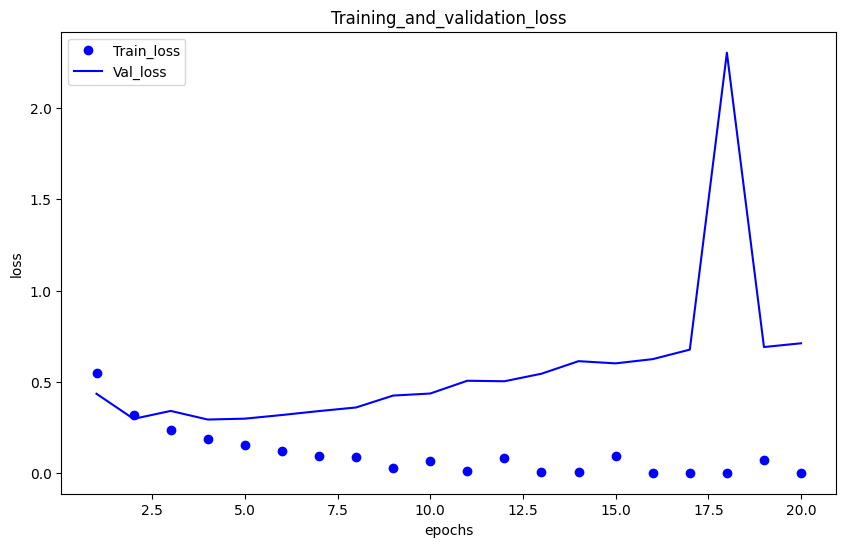

<Figure size 640x480 with 0 Axes>

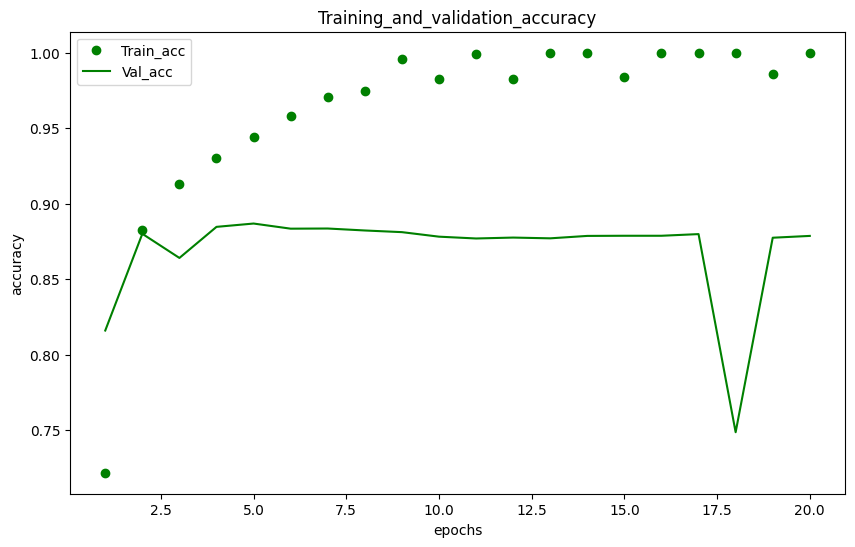

In [15]:
#epoch wise performance observation
loss_values2 = history2_dict["loss"]
val_loss_values2 = history2_dict["val_loss"]
epochs = range(1, len(loss_values2) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values2, "bo", label="Train_loss")
plt.plot(epochs, val_loss_values2, "b", label="Val_loss")
plt.title("Training_and_validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))
acc2 = history2_dict["accuracy"]
val_acc2 = history2_dict["val_accuracy"]
plt.plot(epochs, acc2, "go", label="Train_acc")
plt.plot(epochs, val_acc2, "g", label="Val_acc")
plt.title("Training_and_validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [16]:
#Retrain the model from scratch on all training data after evaluating validation performance
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model2.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6825 - loss: 0.5776
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8940 - loss: 0.2791
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9175 - loss: 0.2181


In [17]:
#for test set
results2 = model2.evaluate(x_test, y_test)
print(results2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8649 - loss: 0.3323
[0.32518672943115234, 0.8676400184631348]


**Summary of the  approach 2:**

In this second approach, I modified the network architecture by increasing the number of layers. The model now consists of a fully connected neural network with 5 dense layers. All hidden layers use the ReLU activation function, while the final output layer consists of a single neuron with a Sigmoid activation function, appropriate for binary classification. The first layer contains 64 neurons, followed by the second and third layers with 32 neurons each, and the fourth layer with 16 neurons.

After evaluating the validation accuracy, I decided to train the final model for 3 epochs. The optimizer (RMSprop) and the loss function (binary cross-entropy) remained the same as in the previous setup. This configuration resulted in an accuracy of 86.76% and a loss of 32.51%.

**model building: approach 3**

In [18]:
#model architecture
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model3 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model3.compile(optimizer=rmsprop,
              loss="binary_crossentropy",
              metrics=["accuracy"])

#fit the model
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

history3_dict = history3.history
history3_dict.keys()

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.5350 - loss: 0.6914 - val_accuracy: 0.6490 - val_loss: 0.6803
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.6853 - loss: 0.6735 - val_accuracy: 0.7332 - val_loss: 0.6538
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7633 - loss: 0.6421 - val_accuracy: 0.7846 - val_loss: 0.6195
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8062 - loss: 0.6042 - val_accuracy: 0.8100 - val_loss: 0.5841
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8349 - loss: 0.5650 - val_accuracy: 0.8266 - val_loss: 0.5499
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8503 - loss: 0.5282 - val_accuracy: 0.8366 - val_loss: 0.5171
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8574 - loss: 0.4959 - val_accuracy: 0.8461 - val_loss: 0.4854
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8654 - loss: 0.4604 - val_accuracy: 0.8533 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

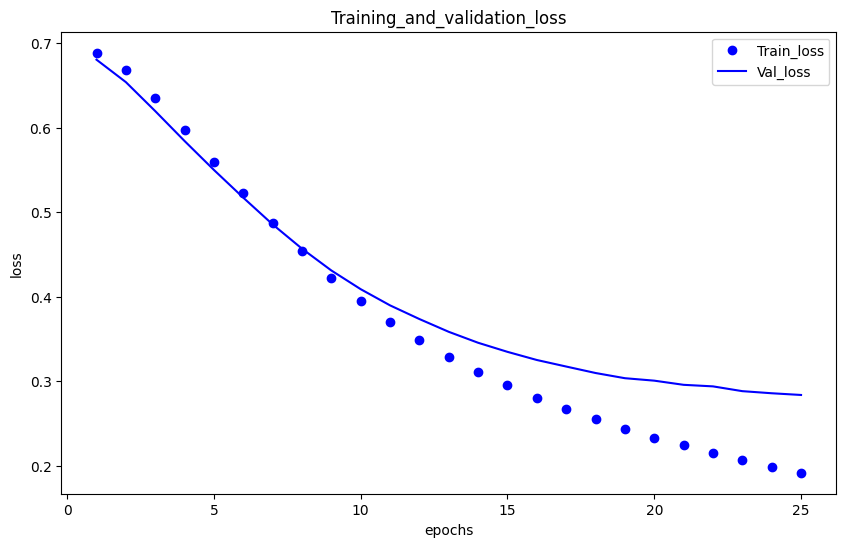

<Figure size 640x480 with 0 Axes>

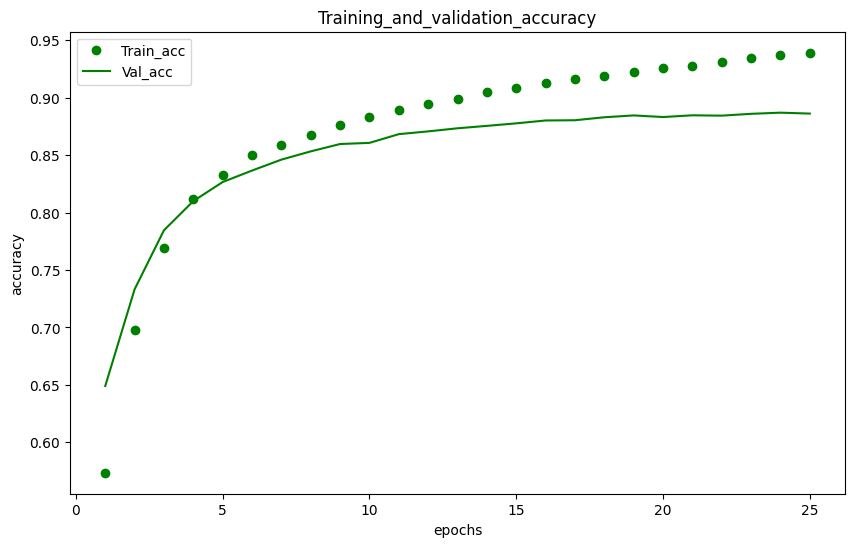

In [19]:
#epoch wise performance observation
loss_values3 = history3_dict["loss"]
val_loss_values3 = history3_dict["val_loss"]
epochs = range(1, len(loss_values3) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values3, "bo", label="Train_loss")
plt.plot(epochs, val_loss_values3, "b", label="Val_loss")
plt.title("Training_and_validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))
acc3 = history3_dict["accuracy"]
val_acc3 = history3_dict["val_accuracy"]
plt.plot(epochs, acc3, "go", label="Train_acc")
plt.plot(epochs, val_acc3, "g", label="Val_acc")
plt.title("Training_and_validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [20]:
#Retrain the model from scratch on all training data after evaluating validation performance
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model3 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model3.compile(optimizer=rmsprop,
              loss="binary_crossentropy",
              metrics=["accuracy"])

model3.fit(x_train, y_train, epochs=13, batch_size=1024)

Epoch 1/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5638 - loss: 0.6859
Epoch 2/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7597 - loss: 0.6234
Epoch 3/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8221 - loss: 0.5475
Epoch 4/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8526 - loss: 0.4845
Epoch 5/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8655 - loss: 0.4317
Epoch 6/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8804 - loss: 0.3830
Epoch 7/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8858 - loss: 0.3495
Epoch 8/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8946 - loss: 0.3202
Epoch 9/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9039 - loss: 0.2937
Epoch 10/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9082 - loss: 0.2730
Epoch 11/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9152 - loss: 0.2584
Epoch 12/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy:

In [21]:
#for test set
results3 = model3.evaluate(x_test, y_test)
print(results3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.2926
[0.2921653985977173, 0.883840024471283]


**Summary of the  approach 3:**

In this approach, the learning rate of the RMSprop optimizer was reduced to 0.0001, leading to a smoother validation curve. To compensate, the number of epochs was increased and the batch size was doubled. The model architecture was simplified to 4 Dense layers with 64, 32, 16, and 1 neurons, using ReLU activations for the first three layers and Sigmoid for the output. The final model was trained for 13 epochs, achieving 88.34% accuracy and 29.21% loss.

**model building: approach 4**

In [23]:
#model architecture
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model4.compile(optimizer=Adam,
              loss="binary_crossentropy",
              metrics=["accuracy"])

#fit the model in the partial training set
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(x_val, y_val))
#keeping track
history4_dict = history4.history
history4_dict.keys()

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5259 - loss: 0.6918 - val_accuracy: 0.6261 - val_loss: 0.6838
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6838 - loss: 0.6760 - val_accuracy: 0.7235 - val_loss: 0.6610
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7708 - loss: 0.6457 - val_accuracy: 0.7821 - val_loss: 0.6218
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8236 - loss: 0.5981 - val_accuracy: 0.8204 - val_loss: 0.5710
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8522 - loss: 0.5393 - val_accuracy: 0.8440 - val_loss: 0.5132
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8783 - loss: 0.4742 - val_accuracy: 0.8582 - val_loss: 0.4602
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8902 - loss: 0.4186 - val_accuracy: 0.8674 - val_loss: 0.4170
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9041 - loss: 0.3676 - val_accuracy: 0.8751 - va

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

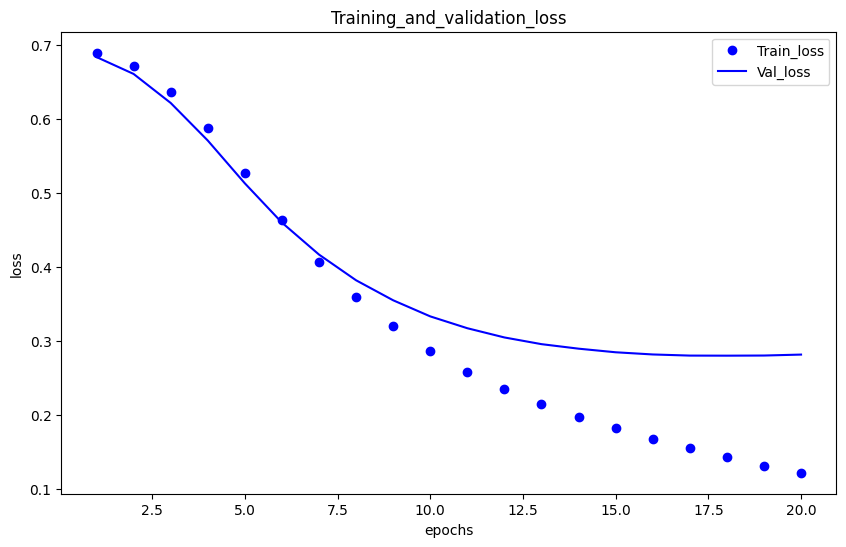

<Figure size 640x480 with 0 Axes>

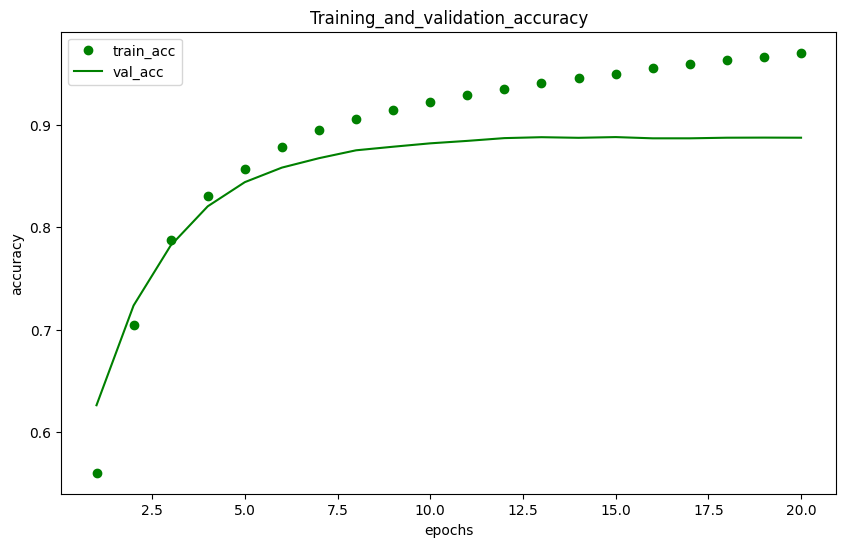

In [25]:
#epoch wise performance observation
loss_values4 = history4_dict["loss"]
val_loss_values4 = history4_dict["val_loss"]
epochs = range(1, len(loss_values4) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values4, "bo", label="Train_loss")
plt.plot(epochs, val_loss_values4, "b", label="Val_loss")
plt.title("Training_and_validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))
acc4 = history4_dict["accuracy"]
val_acc4 = history4_dict["val_accuracy"]
plt.plot(epochs, acc4, "go", label="train_acc")
plt.plot(epochs, val_acc4, "g", label="val_acc")
plt.title("Training_and_validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [26]:
#Retrain the model from scratch on all training data after evaluating validation performance
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model4.compile(optimizer=Adam,
              loss="binary_crossentropy",
              metrics=["accuracy"])

model4.fit(x_train, y_train, epochs=10, batch_size=1024)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5188 - loss: 0.6901
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7286 - loss: 0.6467
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8387 - loss: 0.5439
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8785 - loss: 0.4216
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9018 - loss: 0.3367
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9141 - loss: 0.2840
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9276 - loss: 0.2437
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9352 - loss: 0.2170
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9425 - loss: 0.1926
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9485 - loss: 0.1757


In [27]:
#for test set
results4 = model4.evaluate(x_test, y_test)
print(results4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8841 - loss: 0.2914
[0.2899591028690338, 0.8857600092887878]


**Summary of the  approach 4 : It performed better than other approaches**

In this approach, I changed the optimizer to Adam with a learning rate of 0.0001. The rest of the network structure remained the same as in the second approach, except I increased the batch size to 1024.

After observing the validation accuracy, I  trained the final model for 10 epochs. This achieved an accuracy of  **88.57%** and a loss of 28.99%.
**Among the other hyperparameters set up, I found this one as best performing approach.**

**model building: approach 5**

In [28]:
#model architecture
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model5.compile(optimizer=rmsprop,
              loss="poisson",
              metrics=["accuracy"])

#fit the model
history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history5_dict = history5.history
history5_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.5729 - loss: 0.8379 - val_accuracy: 0.8194 - val_loss: 0.8028
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8385 - loss: 0.7686 - val_accuracy: 0.8724 - val_loss: 0.7084
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8858 - loss: 0.6701 - val_accuracy: 0.8573 - val_loss: 0.6705
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9098 - loss: 0.6239 - val_accuracy: 0.8865 - val_loss: 0.6499
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9247 - loss: 0.5926 - val_accuracy: 0.8829 - val_loss: 0.6488
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9422 - loss: 0.5772 - val_accuracy: 0.8859 - val_loss: 0.6424
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9487 - loss: 0.5674 - val_accuracy: 0.8852 - val_loss: 0.6471
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9554 - loss: 0.5652 - val_accuracy: 0.8788 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

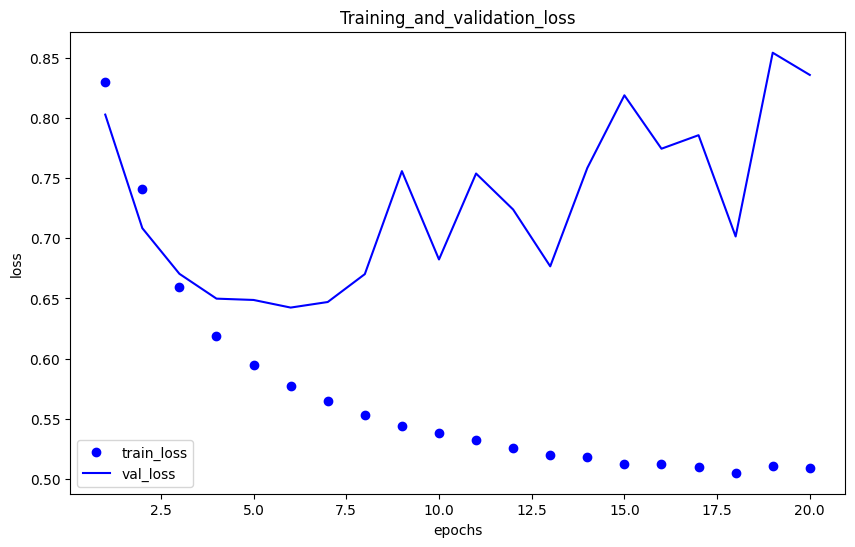

<Figure size 640x480 with 0 Axes>

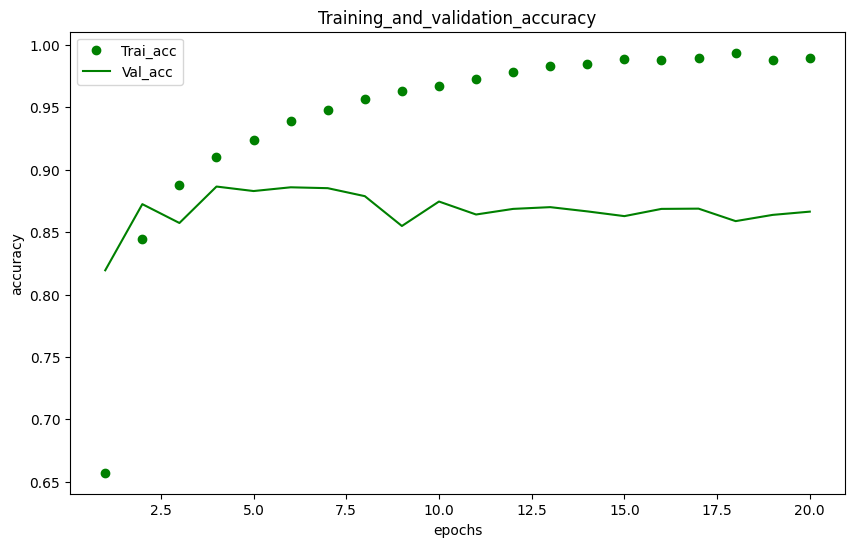

In [29]:
#epoch wise performance observation
loss_values5 = history5_dict["loss"]
val_loss_values5 = history5_dict["val_loss"]
epochs = range(1, len(loss_values5) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values5, "bo", label="train_loss")
plt.plot(epochs, val_loss_values5, "b", label="val_loss")
plt.title("Training_and_validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))
acc5 = history5_dict["accuracy"]
val_acc5 = history5_dict["val_accuracy"]
plt.plot(epochs, acc5, "go", label="Trai_acc")
plt.plot(epochs, val_acc5, "g", label="Val_acc")
plt.title("Training_and_validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [30]:
#Retrain the model from scratch on all training data after evaluating validation performance
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model5.compile(optimizer=rmsprop,
              loss="poisson",
              metrics=["accuracy"])

model5.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6186 - loss: 0.8341
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8468 - loss: 0.7740
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8996 - loss: 0.6604
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9190 - loss: 0.6224


In [31]:
#for test set
results5 = model5.evaluate(x_test, y_test)
print(results5)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8660 - loss: 0.6536
[0.6620990037918091, 0.8676000237464905]


**Summary of the  approach 5:**

In this attempt, I used the Poisson loss function along with the RMSprop optimizer set to a learning rate of 0.001. However, the overall performance of the model was not satisfactory.The neural network architecture consisted of 5 Dense layers: the first three layers had 16 neurons each, the fourth had 8 neurons, and the final output layer had 1 neuron. ReLU activation was applied to the first four layers, while the output layer used a Sigmoid activation function for binary classification.Based on validation accuracy, I trained the final model for 4 epochs, which resulted in 86.76% accuracy but a high loss of 66.20%.

**model building: approach 6**

In [32]:
#model architecture
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model6 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model6.compile(optimizer=rmsprop,
              loss="binary_crossentropy",
              metrics=["accuracy"])

#fit the model
history6 = model6.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val))

history6_dict = history6.history
history6_dict.keys()

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5692 - loss: 0.6868 - val_accuracy: 0.7582 - val_loss: 0.6401
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8048 - loss: 0.6098 - val_accuracy: 0.8308 - val_loss: 0.5314
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8669 - loss: 0.4879 - val_accuracy: 0.8584 - val_loss: 0.4335
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8922 - loss: 0.3864 - val_accuracy: 0.8717 - val_loss: 0.3690
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9067 - loss: 0.3154 - val_accuracy: 0.8799 - val_loss: 0.3267
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9184 - loss: 0.2671 - val_accuracy: 0.8831 - val_loss: 0.3034
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9285 - loss: 0.2314 - val_accuracy: 0.8872 - val_loss: 0.2877
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9377 - loss: 0.2018 - val_accuracy: 0.8875 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

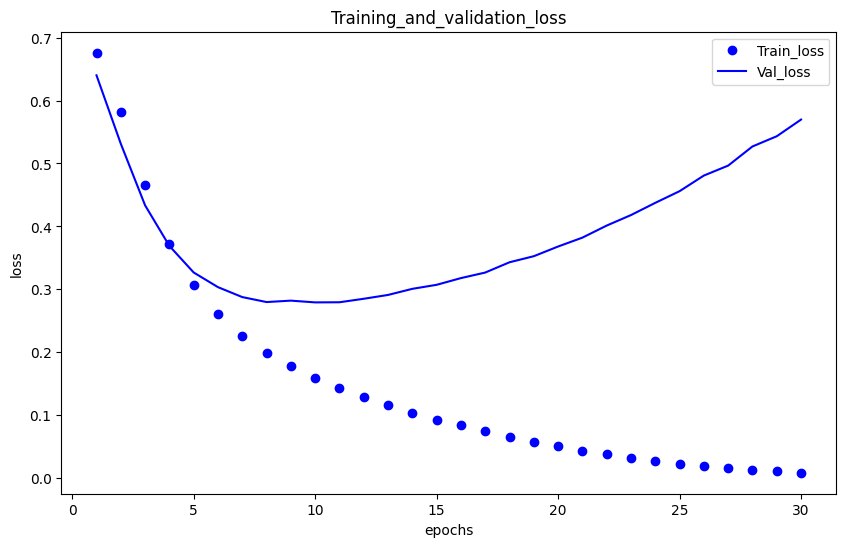

<Figure size 640x480 with 0 Axes>

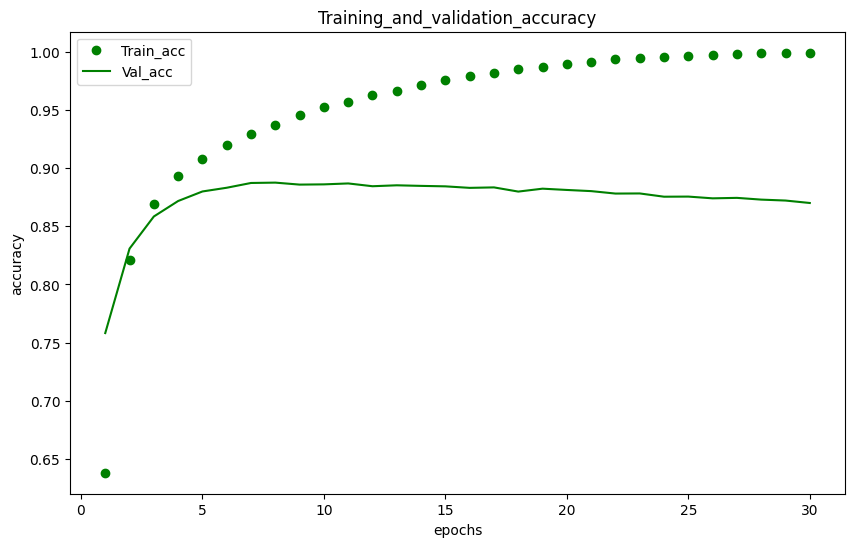

In [33]:
#epoch wise performance observation
loss_values6 = history6_dict["loss"]
val_loss_values6 = history6_dict["val_loss"]
epochs = range(1, len(loss_values6) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values6, "bo", label="Train_loss")
plt.plot(epochs, val_loss_values6, "b", label="Val_loss")
plt.title("Training_and_validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10,6))
acc_6 = history6_dict["accuracy"]
val_acc6 = history6_dict["val_accuracy"]
plt.plot(epochs, acc_6, "go", label="Train_acc")
plt.plot(epochs, val_acc6, "g", label="Val_acc")
plt.title("Training_and_validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [34]:
#Retrain the model from scratch on all training data after evaluating validation performance
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model6 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Compiling
model6.compile(optimizer=rmsprop,
              loss="binary_crossentropy",
              metrics=["accuracy"])

model6.fit(x_train, y_train, epochs=5, batch_size=256)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6260 - loss: 0.6738
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8444 - loss: 0.5138
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8812 - loss: 0.3712
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9025 - loss: 0.2851
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9168 - loss: 0.2386


In [35]:
#for test set
results6 = model6.evaluate(x_test, y_test)
print(results6)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8831 - loss: 0.2897
[0.28889909386634827, 0.8849200010299683]


**Summary of the  approach 6:**

In this setup, I used the RMSprop optimizer with a learning rate of 0.0001 and Binary Crossentropy as the loss function. The model architecture consists of 5 fully connected Dense layers with 64, 32, 16, 16, and 1 neurons, respectively. The first four layers use the ReLU activation function, while the final output layer uses Sigmoid for binary classification.
After reviewing the validation accuracy, I train the final model for 5 epochs with a batch size of 256. This configuration achieved an accuracy of 88.49% and a loss of 28.88%.